# Les réseaux de neurones récurrents

Les réseaux de neurones récurrents (Recurrent Neural Networks, RNN) constituent un type d'architecture de réseaux de neurones dédié au traitement de données séquentielles.

# Architecture d'une cellule RNN

L'état d'un RNN (Vanila) est composé d'un seul vecteur `h`. 

<img src="images/rnn/rnn.png" />

A l'état `t` la cellule prend en entrée les vecteurs suivants :
* `X(t)` :  représentation vectorielle de l'élément courant de la séquence
* `h(t-1)` : état caché de la cellule précédente

L'état caché est mis à jour avec les inputs (`X(t)` , `h(t-1)`) et une fonction d'activation `tanh`. En fonction du type de prédiction, on peut appliquer une fonction sigmoïde ou softmax.

<img src="images/rnn/rnn_frm.png" />

# Mémoire court terme

L'information de la séquence déjà observée est contenue dans l'état caché. Dans les RNN, elle se concentre sur les dernières données observées. C'est pourquoi on dit que les RNN possède une mémoire à court terme. Cela empêche le modèle d'apprendre sur des séquences de longues (données textuelles ou temporelles)

D'autres architectures comme les [LSTM](python-nlp-lstm.ipynb) (Long Short-Term Memory) et les [GRU](python-nlp-gru.ipynb) (Gated Reccurent Unit) ont été proposés afin de corriger ce défaut des RNN. 

Ce type de réseau rencontre également un problème lorsque la séquence à traiter est trop longue. En effet la rétropropagation du gradient de l'erreur peut exploser ou se contracter.

## Exemple : Modèlisation d'une série temporelle avec les RNN

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings("ignore")
sns.set()
np.random.seed(1234)
tf.random.set_seed(1234)
def prepare_data(series, size=1):
    data_X, data_Y = [], []
    m = len(series) - size - 1
    for i in range(m):
        data_X.append(series[i: (i + size)])
        data_Y.append(series[i + size])
    return np.array(data_X), np.array(data_Y)

In [2]:
data = pd.read_csv('data/airline-passengers.csv')
data.columns = data.columns.str.upper()
data.shape

(144, 2)

In [3]:
data.head()

,MONTH,PASSENGERS
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
train, test = data.iloc[:100], data.iloc[100:]
train.shape, test.shape

((100, 2), (44, 2))

In [5]:
size = 1
scaler = MinMaxScaler().fit(train[['PASSENGERS']])
train_X = scaler.transform(train[['PASSENGERS']])
test_X = scaler.transform(test[['PASSENGERS']])
train_X, train_Y = prepare_data(train_X, size)
test_X, test_Y = prepare_data(test_X, size)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [6]:
rnn = keras.Sequential(
    [
        layers.SimpleRNN(16, activation="relu", return_sequences=True, input_shape=(1, size)),
        layers.Flatten(),
        layers.Dense(1, activation = "linear")
    ]
)
rnn.compile(loss="mean_squared_error",optimizer="rmsprop")
_ = rnn.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=0)

In [7]:
predicted = rnn.predict(test_X)
predicted = scaler.inverse_transform(predicted)

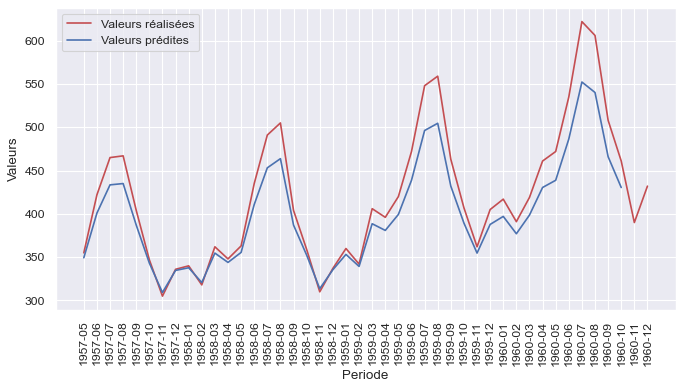

In [8]:
plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test['PASSENGERS'].values, color="r", label="Valeurs réalisées")
plt.plot(predicted, color="b", label="Valeurs prédites")
plt.xticks(range(test.shape[0]), labels=test['MONTH'], rotation='vertical')
plt.legend()
plt.xlabel("Periode")
plt.ylabel("Valeurs")
plt.grid(True)
plt.show()

**Références :**  
[Fei-Fei Li, Andrej Karpathy, Justin Johnson, Recurrent Neural Networks](http://cs231n.stanford.edu/slides/2016/winter1516_lecture10.pdf)  